In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
mnist = input_data.read_data_sets("MNIST_data", one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [4]:
# 训练集图片矩阵，代表55000张图片，每张图片为一个向量，其长度为784
mnist.train.images.shape

(55000, 784)

In [5]:
# 训练集标记矩阵，代表55000张图片的标记，每张图片为一个10维的独热编码向量
mnist.train.labels.shape

(55000, 10)

In [6]:
mnist.test.images.shape

(10000, 784)

In [7]:
mnist.test.labels.shape

(10000, 10)

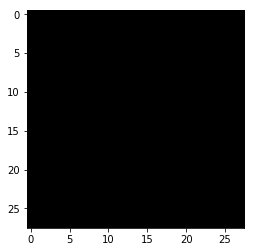

In [8]:
# 可视化训练集中的图片
plt.imshow(Image.fromarray(mnist.train.images[0].reshape(28, 28)))

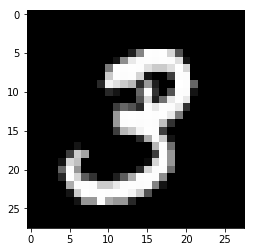

In [9]:
# 可视化训练集中的图片
plt.imshow(Image.fromarray((mnist.train.images[1] * 255).astype(np.uint8).reshape([28,28])))

In [10]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [11]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(labels * tf.log(output + 1e-7),axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 15.6144, acc 0.0694
step   500, loss 13.4961, acc 0.3007
step  1000, loss 11.3820, acc 0.4244
step  1500, loss 7.4669, acc 0.4967
step  2000, loss 8.5507, acc 0.5779
step  2500, loss 4.8071, acc 0.6389
step  3000, loss 3.7524, acc 0.6766
step  3500, loss 5.5406, acc 0.6988
step  4000, loss 7.0105, acc 0.7137
step  4500, loss 2.6580, acc 0.7296
step  5000, loss 3.7784, acc 0.7383
step  5500, loss 2.8094, acc 0.7453
step  6000, loss 3.8556, acc 0.7472
step  6500, loss 2.5606, acc 0.7522
step  7000, loss 4.2431, acc 0.7616
step  7500, loss 3.5099, acc 0.7596
step  8000, loss 3.5808, acc 0.7660
step  8500, loss 2.9482, acc 0.7662
step  9000, loss 3.6419, acc 0.7706
step  9500, loss 3.4500, acc 0.7744
step 10000, loss 4.2020, acc 0.7751
step 10500, loss 4.0295, acc 0.7824
step 11000, loss 5.0582, acc 0.7824
step 11500, loss 3.4962, acc 0.7795
step 12000, loss 3.0215, acc 0.7853
step 12500, loss 3.1658, acc 0.7877
step 13000, loss 3.6675, acc 0.7839
step 13500, loss 2.6624, 

## 作业

1. 浮现上述代码。

已完成，如上所示。但存在一个问题，代码显示数字一直是黑的。

2. 计算模型参数。

输入层28*28
输出层10
隐藏层128
学习率0.01
步长32
训练20000步
每500次保存一下


3. 使用不同大小的批次进行实验，观察模型收敛速度与收敛平稳性。



当batch_size从32变为64，则收敛速度加快，并且最终正确率得到提升，

当batch_size从32变为16，则收敛速度变慢，并且最终正确率降低。

In [12]:
#当batch_size从32变为64，则收敛速度加快，并且最终正确率得到提升
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(labels * tf.log(output + 1e-7),axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(64)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 64):
                batch_images, batch_labels = mnist.test.next_batch(64)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.7134, acc 0.1089
step   500, loss 13.0960, acc 0.1642
step  1000, loss 13.6415, acc 0.2189
step  1500, loss 11.0697, acc 0.2617
step  2000, loss 12.3430, acc 0.2757
step  2500, loss 11.8710, acc 0.2909
step  3000, loss 11.8445, acc 0.3313
step  3500, loss 8.6527, acc 0.3878
step  4000, loss 9.1477, acc 0.4037
step  4500, loss 8.9540, acc 0.4158
step  5000, loss 8.5739, acc 0.4222
step  5500, loss 9.3395, acc 0.4248
step  6000, loss 7.2846, acc 0.4338
step  6500, loss 9.2170, acc 0.4694
step  7000, loss 7.5167, acc 0.4977
step  7500, loss 7.3035, acc 0.5046
step  8000, loss 7.8265, acc 0.5158
step  8500, loss 5.5371, acc 0.5178
step  9000, loss 8.0591, acc 0.5250
step  9500, loss 7.0517, acc 0.5210
step 10000, loss 7.5554, acc 0.5295
step 10500, loss 7.7089, acc 0.5303
step 11000, loss 10.0715, acc 0.5278
step 11500, loss 7.0687, acc 0.5373
step 12000, loss 7.2326, acc 0.5303
step 12500, loss 6.5623, acc 0.5355
step 13000, loss 6.0389, acc 0.5361
step 13500, loss 7.8

In [13]:
#当batch_size从32变为16，则收敛速度变慢，并且最终正确率降低
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(labels * tf.log(output + 1e-7),axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(16)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 16):
                batch_images, batch_labels = mnist.test.next_batch(16)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 12.0886, acc 0.0988
step   500, loss 10.2320, acc 0.4400
step  1000, loss 7.0589, acc 0.5485
step  1500, loss 9.0664, acc 0.5911
step  2000, loss 6.6772, acc 0.6086
step  2500, loss 5.7152, acc 0.6262
step  3000, loss 7.1697, acc 0.6204
step  3500, loss 8.0590, acc 0.6373
step  4000, loss 7.0317, acc 0.6405
step  4500, loss 6.3222, acc 0.6422
step  5000, loss 3.1286, acc 0.6543
step  5500, loss 7.0517, acc 0.6638
step  6000, loss 7.0517, acc 0.6847
step  6500, loss 5.0342, acc 0.6888
step  7000, loss 4.0294, acc 0.7003
step  7500, loss 1.0074, acc 0.7076
step  8000, loss 3.6345, acc 0.7119
step  8500, loss 4.8239, acc 0.7119
step  9000, loss 6.0434, acc 0.7157
step  9500, loss 5.0369, acc 0.7134
step 10000, loss 4.0295, acc 0.7189
step 10500, loss 4.6433, acc 0.7272
step 11000, loss 3.0266, acc 0.7255
step 11500, loss 5.0510, acc 0.7297
step 12000, loss 4.0485, acc 0.7313
step 12500, loss 4.0306, acc 0.7166
step 13000, loss 5.1369, acc 0.7326
step 13500, loss 3.0222, a


4. 使用不同大小的学习率进行实验，观察模型收敛速度与收敛平稳性。


In [14]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(labels * tf.log(output + 1e-7),axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.001)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 15.2603, acc 0.1015
step   500, loss 13.5911, acc 0.1322
step  1000, loss 12.2339, acc 0.1702
step  1500, loss 13.8662, acc 0.2010
step  2000, loss 11.4590, acc 0.2373
step  2500, loss 13.9788, acc 0.2515
step  3000, loss 12.5850, acc 0.2781
step  3500, loss 10.2408, acc 0.2959
step  4000, loss 8.5683, acc 0.3192
step  4500, loss 8.9627, acc 0.3402
step  5000, loss 8.7279, acc 0.3606
step  5500, loss 9.4678, acc 0.3746
step  6000, loss 8.6496, acc 0.3921
step  6500, loss 9.0665, acc 0.4087
step  7000, loss 10.4447, acc 0.4182
step  7500, loss 9.8031, acc 0.4291
step  8000, loss 7.7719, acc 0.4425
step  8500, loss 7.5303, acc 0.4534
step  9000, loss 8.4727, acc 0.4681
step  9500, loss 8.7967, acc 0.4682
step 10000, loss 9.1070, acc 0.4784
step 10500, loss 9.8013, acc 0.4908
step 11000, loss 10.0700, acc 0.4958
step 11500, loss 5.5186, acc 0.5066
step 12000, loss 9.3205, acc 0.5220
step 12500, loss 7.1234, acc 0.5234
step 13000, loss 8.0605, acc 0.5421
step 13500, loss 6

In [15]:
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(labels * tf.log(output + 1e-7),axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.1)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.5800, acc 0.0913
step   500, loss 10.0645, acc 0.5212
step  1000, loss 4.3951, acc 0.7730
step  1500, loss 1.7427, acc 0.8539
step  2000, loss 1.0074, acc 0.8736
step  2500, loss 0.9576, acc 0.8944
step  3000, loss 1.0984, acc 0.8999
step  3500, loss 1.2778, acc 0.8987
step  4000, loss 1.0085, acc 0.9042
step  4500, loss 1.5085, acc 0.9176
step  5000, loss 2.1303, acc 0.9223
step  5500, loss 1.2409, acc 0.9173
step  6000, loss 1.9968, acc 0.9217
step  6500, loss 0.0588, acc 0.9296
step  7000, loss 1.0198, acc 0.9228
step  7500, loss 0.0000, acc 0.9309
step  8000, loss 0.0240, acc 0.9326
step  8500, loss 1.0949, acc 0.9304
step  9000, loss 1.0069, acc 0.9369
step  9500, loss 0.6307, acc 0.9343
step 10000, loss 0.5037, acc 0.9339
step 10500, loss -0.0000, acc 0.9381
step 11000, loss -0.0000, acc 0.9394
step 11500, loss 1.4347, acc 0.9383
step 12000, loss 0.2074, acc 0.9380
step 12500, loss 0.9790, acc 0.9441
step 13000, loss 0.6573, acc 0.9368
step 13500, loss 1.4214,


上面的学习率分别为0.1和0.001，学习率调高，会使训练速度加快，但不稳；调小学习率，会使训练变慢，模型平稳性更好。



5. 使用不同的激活函数进行实验，观察模型收敛速度与收敛平性能。


In [16]:
#激活函数  relu
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 13.0959, acc 0.1292
step   500, loss 12.1683, acc 0.2962
step  1000, loss 12.5876, acc 0.3827
step  1500, loss 10.8858, acc 0.4551
step  2000, loss 8.8246, acc 0.4865
step  2500, loss 8.5445, acc 0.5270
step  3000, loss 7.5542, acc 0.5673
step  3500, loss 6.9494, acc 0.5943
step  4000, loss 5.5768, acc 0.6185
step  4500, loss 4.7582, acc 0.6385
step  5000, loss 4.3366, acc 0.6432
step  5500, loss 4.5212, acc 0.6510
step  6000, loss 4.7848, acc 0.6564
step  6500, loss 5.1646, acc 0.6658
step  7000, loss 6.5453, acc 0.6729
step  7500, loss 5.1383, acc 0.7100
step  8000, loss 4.9105, acc 0.7373
step  8500, loss 4.3792, acc 0.7497
step  9000, loss 3.6290, acc 0.7583
step  9500, loss 3.1404, acc 0.7621
step 10000, loss 3.9865, acc 0.7626
step 10500, loss 2.5185, acc 0.7674
step 11000, loss 5.0380, acc 0.7740
step 11500, loss 3.0797, acc 0.7700
step 12000, loss 1.5292, acc 0.7762
step 12500, loss 3.6769, acc 0.7777
step 13000, loss 4.0816, acc 0.7791
step 13500, loss 5.8161,

In [17]:
#激活函数  tf.nn.tanh
with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.tanh(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 11.6617, acc 0.0825
step   500, loss 7.9587, acc 0.2768
step  1000, loss 6.2741, acc 0.4131
step  1500, loss 4.2745, acc 0.5046
step  2000, loss 2.7654, acc 0.6253
step  2500, loss 1.1400, acc 0.6733
step  3000, loss 2.3333, acc 0.7118
step  3500, loss 1.9026, acc 0.7305
step  4000, loss 2.3149, acc 0.7539
step  4500, loss 1.5815, acc 0.7606
step  5000, loss 1.6918, acc 0.7745
step  5500, loss 2.2712, acc 0.7843
step  6000, loss 1.2548, acc 0.7916
step  6500, loss 0.8253, acc 0.7975
step  7000, loss 0.6048, acc 0.8034
step  7500, loss 1.6530, acc 0.8067
step  8000, loss 1.2453, acc 0.8126
step  8500, loss 1.1172, acc 0.8191
step  9000, loss 0.4795, acc 0.8246
step  9500, loss 0.4343, acc 0.8210
step 10000, loss 0.7750, acc 0.8281
step 10500, loss 0.6323, acc 0.8323
step 11000, loss 0.9584, acc 0.8356
step 11500, loss 1.3960, acc 0.8379
step 12000, loss 0.5025, acc 0.8407
step 12500, loss 1.0205, acc 0.8430
step 13000, loss 0.5352, acc 0.8490
step 13500, loss 0.2568, ac


使用relu和tanh激活函数，tanh激活函数的正确率较高、收敛速度较快。



6. 尝试使用不同的参数初始化方法（如使用不同的正态分布、均匀分布、固定值等方法），观察模型收敛速度。


In [18]:
#初始化方法：tf.random_uniform

with tf.Graph().as_default() as g:
    # 输入、标记占位符
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    
    # 创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784, 128]), name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128, ]), name='hidden_bias')
    # 隐藏层前向传播
    hidden_output = tf.nn.tanh(tf.matmul(inputs, hidden_weight) + hidden_bias)
    
    
    # 创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_uniform([128, 10], name='output_weight'))
    output_bias = tf.Variable(tf.zeros([10, ]), name='output_bias')
    # 输出层前向传播
    logits = tf.matmul(hidden_output, output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    
    # 代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
        labels * tf.log(output + 1e-7),
        axis=1))
    
    
    # 正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)),
                tf.float32))


with tf.Session(graph=g) as sess:
    # 定义梯度下降法优化器
    optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    # 训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict={
            inputs: batch_images,
            labels: batch_labels
        })
        
        # 输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict={
                    inputs: batch_images,
                    labels: batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 5.7012, acc 0.1122
step   500, loss 1.6599, acc 0.6014
step  1000, loss 0.5949, acc 0.7069
step  1500, loss 0.7479, acc 0.7534
step  2000, loss 0.4924, acc 0.7806
step  2500, loss 0.3338, acc 0.7997
step  3000, loss 0.4499, acc 0.8180
step  3500, loss 0.5554, acc 0.8229
step  4000, loss 0.2113, acc 0.8324
step  4500, loss 0.5579, acc 0.8355
step  5000, loss 0.3798, acc 0.8399
step  5500, loss 0.3895, acc 0.8457
step  6000, loss 0.4924, acc 0.8530
step  6500, loss 0.6961, acc 0.8560
step  7000, loss 0.6093, acc 0.8562
step  7500, loss 0.1468, acc 0.8508
step  8000, loss 0.4930, acc 0.8618
step  8500, loss 0.2659, acc 0.8667
step  9000, loss 0.2459, acc 0.8657
step  9500, loss 0.3815, acc 0.8652
step 10000, loss 0.4989, acc 0.8697
step 10500, loss 0.6632, acc 0.8743
step 11000, loss 0.5390, acc 0.8686
step 11500, loss 0.4561, acc 0.8751
step 12000, loss 0.2772, acc 0.8690
step 12500, loss 0.4273, acc 0.8766
step 13000, loss 0.5633, acc 0.8780
step 13500, loss 0.4210, acc

使用tf.random_uniform比tf.random_normal的正确率高，且收敛效果更平稳。


7. 思考如何改进模型以使得模型性能增强。


可以调整模型的学习率、训练批次的大小、激活函数、增加隐藏层、增加训练总的步数，初始化方法，改变不同的组合方式来查看是否会提升模型性能。

8. 思考如何给模型添加新的隐藏层并进行实验。

两层隐藏层

In [19]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape=[None, 784], dtype=tf.float32)
    labels = tf.placeholder(shape=[None, 10], dtype=tf.float32)
    
    h1_w = tf.Variable(tf.random_normal([784, 64]), name='h1_w')
    h1_b = tf.Variable(tf.zeros([64, ]), name='h1_b')
    h1_o = tf.nn.relu(tf.matmul(inputs, h1_w)+h1_b)
    
    h2_w = tf.Variable(tf.random_normal([64, 128]), name='h2_w')
    h2_b = tf.Variable(tf.zeros([128, ]), name='h2_b')
    h2_o = tf.nn.relu(tf.matmul(h1_o, h2_w)+h2_b)
    
    o_w = tf.Variable(tf.random_normal([128, 10]), name='o_w')
    o_b = tf.Variable(tf.zeros([10, ]), name='o_w')
    
    logits = tf.matmul(h2_o, o_w) + o_b
    output = tf.nn.softmax(logits)
    
    loss = tf.reduce_mean(-1 * tf.reduce_sum(
            labels * tf.log(output + 1e-7), axis=1))
    
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels, axis=1), tf.argmax(output, axis=1)), 
                dtype=tf.float32))
    
    with tf.Session(graph=g) as sess:
        optim = tf.train.GradientDescentOptimizer(learning_rate=0.01)
        
        train_op = optim.minimize(loss)
        sess.run(tf.global_variables_initializer())
        
        for step in range(50000):
            batch_images, batch_labels = mnist.train.next_batch(64)
            res_loss, _ = sess.run([loss, train_op], feed_dict={
                        inputs: batch_images,
                        labels: batch_labels
            })
            
            if step % 1000 ==0:
                accs = []
                for test_step in range(10000 // 64):
                    batch_images, batch_labels = mnist.test.next_batch(64)
                    
                    res_acc = sess.run(acc, feed_dict={
                        inputs: batch_images,
                        labels: batch_labels
                    })
                    
                    accs.append(res_acc)
                accs = np.mean(accs)
                print('step %5d, loss %2.4f, acc %.4f' % (step, res_loss, accs))

step     0, loss 14.3552, acc 0.1057
step  1000, loss 13.5618, acc 0.1995
step  2000, loss 13.0960, acc 0.2320
step  3000, loss 11.3413, acc 0.3091
step  4000, loss 9.0664, acc 0.3439
step  5000, loss 11.0812, acc 0.4153
step  6000, loss 9.1130, acc 0.4266
step  7000, loss 9.0664, acc 0.4344
step  8000, loss 8.3109, acc 0.4273
step  9000, loss 10.3443, acc 0.4349
step 10000, loss 8.5627, acc 0.4436
step 11000, loss 8.0590, acc 0.4461
step 12000, loss 9.5701, acc 0.4397
step 13000, loss 9.3183, acc 0.4444
step 14000, loss 9.3183, acc 0.4497
step 15000, loss 8.0590, acc 0.4508
step 16000, loss 10.0738, acc 0.4444
step 17000, loss 7.8072, acc 0.4556
step 18000, loss 8.5627, acc 0.4525
step 19000, loss 11.8367, acc 0.4477
step 20000, loss 10.5772, acc 0.4527
step 21000, loss 8.5627, acc 0.4510
step 22000, loss 9.5701, acc 0.4514
step 23000, loss 9.3183, acc 0.4557
step 24000, loss 8.8146, acc 0.4597
step 25000, loss 9.3183, acc 0.4496
step 26000, loss 9.3183, acc 0.4627
step 27000, loss 8.